In [176]:
#Magic to plot on the notebook
#Notebook magic will let you pan and zoom the plots

%matplotlib inline
#%matplotlib notebook

# Hess-Smith panel method

There are many choices as to how to formulate a panel method (singularity solutions, variation within
a panel, singularity strength and distribution, etc.). The simplest and first truly practical method was
proposed by Hess and Smith, Douglas Aircraft, in the early 1960's. It is based on a distribution of sources and
vortices on the surface of the geometry. In their method, the total velocity potential $\phi$ can be computed as follows,

$\phi = \phi_{\infty} + \phi_{s} + \phi_{v}$

where the total velocity potential $\phi$ is composed of $\phi_{\infty} = U_{\infty} (x \ cos \alpha + y \ sin \alpha)$ due to the incoming flow at an angle of attack $\alpha$, $\phi_s$ is due to the source distribution, and $\phi_v$ is due to vorticity distribution. The source and vortex potential can be written as follows,


$\phi_s = \int \dfrac{q(s)}{2 \pi} \ Ln \ r \ ds$

$\phi_v = - \int \dfrac{\gamma(s)}{2 \pi} \ \theta \ ds$

These expressions involves many geometric terms. 

<img src="fig1.png" width="400" height="400">

The total velocity potential can be expressed in discrete form as follows,

$\phi = \phi_{\infty} + \sum_{j=1}^{N} \left[ \dfrac{q_j(s)}{2 \pi} \ Ln \ r_j + \dfrac{\gamma}{2 \pi} \ \theta_j     \right] \ ds   $ 

Note that in these expressions, the integration is to be carried out along the complete surface of the
airfoil. Using the superposition principle, any such distribution of sources/sinks and vortices satisfies
Laplaces equation, but we will need to find conditions for $q(s)$ and $\gamma(s)$ such that the flow tangency
boundary condition and the Kutta condition are satisfied (notice that there are multiple alternatives).

Hess and Smith made the following valid simplification:

*“take the vortex strength to be constant over the whole airfoil and use the Kutta condition to fix its
value, while allowing the source strength to vary from panel to panel so that, together with the constant
vortex distribution, the flow tangency boundary condition is satisfied everywhere.”*

Alternatives to this choice are possible and result in different types of panel methods.

**References:**

* J.L. Hess and A.M.O. Smith. Calculation of potential flow about arbitrary bodies. Prog Aero Sci 1967;8:1–138.

* J.L. Hess and A.M.O. Smith. Calculation of Non-Lifting Potential Flow About Arbitrary Threedimensional Bodies. Douglas-McDonnell Rep. No. E.S. 40622, March 15, 1962; also Journal of Ship Research, No. 8, pp. 22–44, 1964.

In [177]:
"""
Hess-Smith steady panel method
Source-vortex
author: joegi
"""

import numpy as np
import matplotlib.pyplot as plt
import copy

from math import *

In [178]:
# Function to generate NACA 4 digit airfoil

def NACA(naca,c,n):
    
    #pi=3.14159
    
    H=float(naca[0])/100
    p=float(naca[1])/10
    t1=float(naca[2])
    t2=float(naca[3])
    T=10*t1+t2
    T=T/100

    beta=np.linspace(0,pi,n+1)
    xc=np.zeros(np.size(beta))
    for i in range(n+1):
        xc[i]=c*(1-.5*(1-cos(beta[i])))
    
    thdis=np.zeros(np.size(xc))
    
    for i in range(n+1):
        thdis[i]=5*T*c*(0.2969*sqrt(xc[i]/c)-0.126*xc[i]/c-0.3537*(xc[i]/c)**2 +0.2843*(xc[i]/c)**3-0.1015*(xc[i]/c)**4)
    
    camberline=np.zeros(np.size(beta))
    
    if(p!=0.0 and H!=0.0):
        for i in range(n+1):
            if(xc[i] <= p*c):
                camberline[i]=(H/p**2)*xc[i]*(2*p-xc[i]/c)
            elif(xc[i] > p*c):
                camberline[i]=(H/(1-p)**2)*(c-xc[i])*(1+xc[i]/c-2*p)
    
    xu=np.zeros(np.size(xc))
    xl=np.zeros(np.size(xc))
    zu=np.zeros(np.size(xc))
    zl=np.zeros(np.size(xc))
    tht=np.zeros(np.size(xc))
                
    if(p==0 or H==0):
        xu=xc
        zu=thdis
        xl=xc
        zl=-thdis
    else:
        for i in range(n+1):
            if(xc[i] <= p*c):
                tht[i]=atan((2*H/p)*(-xc[i]/(c*p)+1))
            elif(xc[i] > p*c):
                tht[i]=atan((2*H/(1-p**2))*(p-(xc[i]/c)))
            xu[i]=xc[i]-thdis[i]*sin(tht[i])
            zu[i]=camberline[i]+thdis[i]*cos(tht[i])
            xl[i]=xc[i]+thdis[i]*sin(tht[i])
            zl[i]=camberline[i]-thdis[i]*cos(tht[i])
        
        
    X=np.zeros((n+n+1,1),dtype=float)
    Z=np.zeros((n+n+1,1),dtype=float)
    for i in range(n+1):
        X[i]=xl[i]
        Z[i]=zl[i]
    

    for i in range(n):
        X[n+1+i]=xu[n-i-1]
        Z[n+1+i]=zu[n-i-1]
        
    return X,Z

In [179]:
#Call the airfoil generator function with the give parameters

# Number of points on airfoil surface. Set in a per surface basis (bottom surface and top surface)
N=50 

# Chord Length
chord=1  

#NACA AIRFOIL DIGITS
naca=[4,4,1,0]
#naca=[6,2,1,0]

#Call function
xp,yp=NACA(naca,chord,N)

numPanels=np.size(xp)-1


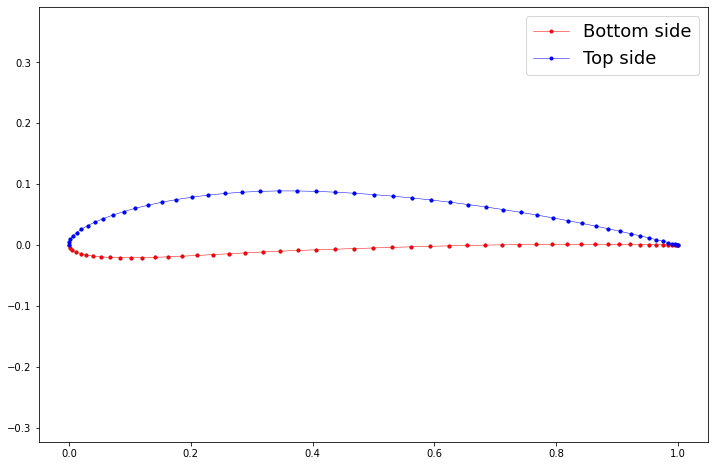

In [180]:
# Plot airfoil

plt.figure(figsize=(12,8))

ll=int(np.size(xp)/2)

plt.scatter(xp,yp,s=8)
plt.plot(xp[0:ll+1],yp[0:ll+1],'-o',ms=3,lw=0.5,c="red",label="Bottom side")
plt.plot(xp[ll+0:np.size(xp)],yp[ll+0:np.size(xp)],'-o',ms=3,lw=0.5,c="blue",label="Top side")
#.plot(xp[ll+0:-1],yp[ll+0:-1],'-o',ms=3,lw=0.5,c="blue",label="Top side")

#plt.scatter(xp,yp,s=8)
#plt.plot(xp,yp)

plt.axis('equal');
plt.legend(loc=0, fontsize=18)


In [181]:
# Setup angle, U_inf and rho

angle=6   #in degrees
AoA=angle*np.pi/180
Uinf=1
rho=1.204


In [182]:
# Collocation points

xc=np.zeros((numPanels,1))
yc=np.zeros((numPanels,1))
for i in range(numPanels):
    xc[i]=(xp[i]+xp[i+1])/2
    yc[i]=(yp[i]+yp[i+1])/2
    

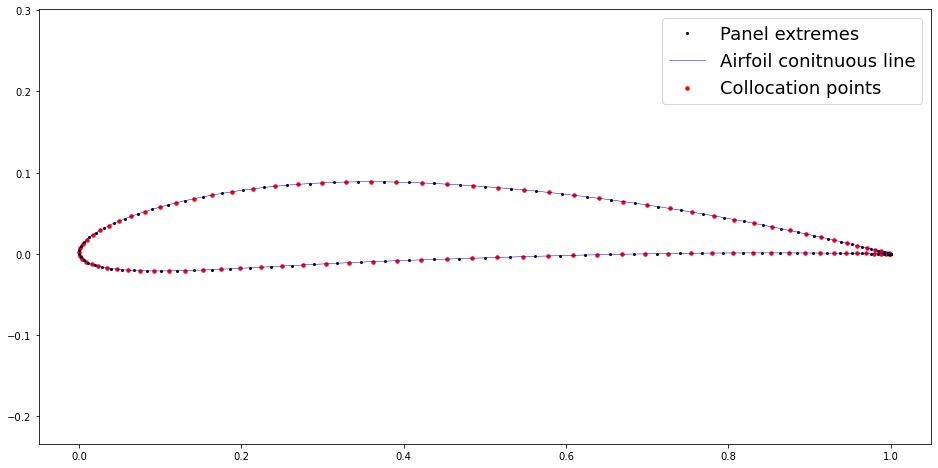

In [183]:
# Plot panels

plt.figure(figsize=(16,8))

plt.scatter(xc,yc,color='r',s=12,label='Collocation points')
plt.plot(xp,yp,linewidth=0,color='black',markersize=2,marker='o',label='Panel extremes')
plt.plot(xp,yp,linewidth=0.5,color='blue',label='Airfoil conitnuous line')
plt.legend(loc=0, fontsize=18)
plt.axis('equal');


In [184]:
# Thetas for each panel

theta=np.zeros((numPanels,1))
for i in range(numPanels):
    theta[i]=np.arctan2(yp[i+1]-yp[i],xp[i+1]-xp[i])


In [185]:
# Initialize influence coefficients global x y

ups=np.zeros((numPanels,numPanels))
wps=np.zeros((numPanels,numPanels)) 


In [186]:
# Local panel coor to global  

for i in range(numPanels):   # collocation points
    for j in range(numPanels):  # panels 
        r1=((xc[i]-xp[j])**2+(yc[i]-yp[j])**2)**(1/2)
        r2=((xc[i]-xp[j+1])**2+(yc[i]-yp[j+1])**2)**(1/2)
        nu2=np.arctan2(-(xc[i]-xp[j])*np.sin(theta[j])+(yc[i]-yp[j])*np.cos(theta[j])+(xp[j+1]-xp[j])*np.sin(theta[j])-(yp[j+1]-yp[j])*np.cos(theta[j]),\
                         (xc[i]-xp[j])*np.cos(theta[j])+(yc[i]-yp[j])*np.sin(theta[j])-(xp[j+1]-xp[j])*np.cos(theta[j])-(yp[j+1]-yp[j])*np.sin(theta[j]))
        nu1=np.arctan2(-(xc[i]-xp[j])*np.sin(theta[j])+(yc[i]-yp[j])*np.cos(theta[j]),(xc[i]-xp[j])*np.cos(theta[j])+(yc[i]-yp[j])*np.sin(theta[j]))
        
        ups[i,j]=1/(4*np.pi)*np.log(r1**2/r2**2) 
        
        wps[i,j]=1/(2*np.pi)*(nu2-nu1)
        
np.fill_diagonal(ups,0)
np.fill_diagonal(wps,.5)
upv=copy.copy(wps)
wpv=-ups


In [187]:
#   calculate normal tangential influence coefficients

nSource=-np.sin(theta-np.transpose(theta))*(ups)+np.cos(theta-np.transpose(theta))*(wps)
tSource=np.cos(theta-np.transpose(theta))*(ups)+np.sin(theta-np.transpose(theta))*(wps)
nVortex=-np.sin(theta-np.transpose(theta))*(upv)+np.cos(theta-np.transpose(theta))*(wpv)
tVortex=np.cos(theta-np.transpose(theta))*(upv)+np.sin(theta-np.transpose(theta))*(wpv)


In [188]:
#   velocity vector

normU=Uinf*np.sin(AoA-theta)
tangU=Uinf*np.cos(AoA-theta)


In [189]:
#   matrix A
A=np.zeros((numPanels+1,numPanels+1))
A[:numPanels,:numPanels]=nSource
A[:numPanels,-1]=np.sum(nVortex,axis=1)
A[-1,:numPanels]=tSource[0,:]+tSource[-1,:]
A[-1,-1]=np.sum(tVortex[0,:])+np.sum(tVortex[-1,:])

# vector b
b=np.zeros((numPanels+1,1))
b[:-1]=-normU
b[-1]=-tangU[0]-tangU[-1]

# solve exactly
x=np.linalg.solve(A,b)


In [190]:
#confirm that velocities on airfoil are tangential

normVelFoil=np.dot(nSource,x[:-1])+np.dot(nVortex,x[-1]*np.ones((numPanels,1)))+normU
tangVelFoil=np.dot(tSource,x[:-1])+np.dot(tVortex,x[-1]*np.ones((numPanels,1)))+tangU


In [191]:
#Get cp

cp=1-(tangVelFoil/Uinf)**2


In [192]:
# Lift from kutta
si=np.zeros((numPanels,1))
perimeter=0
for i in range(numPanels):
    si[i]=((xp[i+1]-xp[i])**2+(yp[i+1]-yp[i])**2)**(1/2)
    perimeter=perimeter+si[i]
gamma=x[-1]*perimeter
Cl_kutta=2*gamma/(Uinf*chord)

print("Lift coefficient = ", Cl_kutta)


Lift coefficient =  [1.21684169]


In [193]:
#perimeter
#Cl_kutta
#x[-1]
#0.48516675

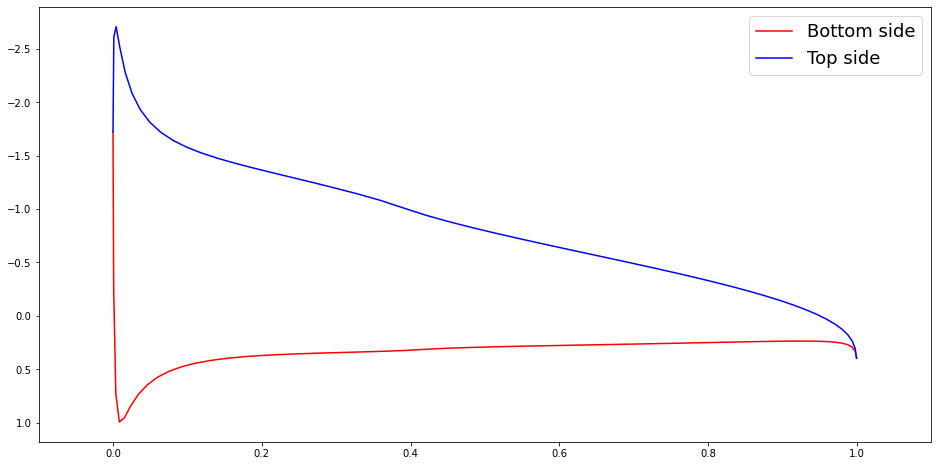

In [194]:
plt.figure(figsize=(16,8))

ll=int(np.size(xc)/2)

#plt.scatter(xp,yp,s=8)
#plt.plot(xc[1:ll],cp[1:ll],c="red",label="Bottom side")
#plt.plot(xc[ll+1:-1],cp[ll+1:-1],c="blue",label="Top side")

plt.plot(xc[0:ll+1],cp[0:ll+1],c="red",label="Bottom side")
plt.plot(xc[ll+0:np.size(xp)],cp[ll+0:np.size(xp)],c="blue",label="Top side")

plt.xlim([-0.1,1.1])
#plt.ylim([1.2,-1])
#plt.ylim([-2,1])
plt.gca().invert_yaxis()
#plt.grid('True')
#plt.axis('equal');
plt.legend(loc=0, fontsize=18)

plt.show();


In [195]:
# calculate velocities in the flow field

#numPoints=30
#xLeft=-.2
#xRight=1.2
#yLower=-.7
#yUpper=.7

numPoints=20
#numPoints=50
xLeft=-1
xRight=2
yLower=-1
yUpper=1

X,Y=np.meshgrid(np.linspace(xLeft,xRight,numPoints),np.linspace(yLower,yUpper,numPoints))
upsField=np.zeros((numPoints*numPoints,numPanels))
wpsField=np.zeros((numPoints*numPoints,numPanels))

#   influence coefficients for points outside the foil
for i in range(numPoints): # each row xof grid points
    for j in range(numPoints): # each grid point in each row
        for k in range(numPanels): # for each panel
            r1=((X[0,j]-xp[k])**2+(Y[i,0]-yp[k])**2)**(1/2)
            r2=((X[0,j]-xp[k+1])**2+(Y[i,0]-yp[k+1])**2)**(1/2)
            nu2=np.arctan2(-(X[0,j]-xp[k])*np.sin(theta[k])+(Y[i,0]-yp[k])*np.cos(theta[k])+(xp[k+1]-xp[k])*np.sin(theta[k])-(yp[k+1]-yp[k])*np.cos(theta[k]),\
                         (X[0,j]-xp[k])*np.cos(theta[k])+(Y[i,0]-yp[k])*np.sin(theta[k])-(xp[k+1]-xp[k])*np.cos(theta[k])-(yp[k+1]-yp[k])*np.sin(theta[k]))
            nu1=np.arctan2(-(X[0,j]-xp[k])*np.sin(theta[k])+(Y[i,0]-yp[k])*np.cos(theta[k]),(X[0,j]-xp[k])*np.cos(theta[k])+(Y[i,0]-yp[k])*np.sin(theta[k]))
            upsField[i*numPoints+j,k]=1/(4*np.pi)*np.log(r1**2/r2**2)
            wpsField[i*numPoints+j,k]=1/(2*np.pi)*(nu2-nu1)
upvField=copy.copy(wpsField)
wpvField=-upsField


In [196]:
#   transform influence coefficients to cartesian
ugsField=upsField*np.cos(np.transpose(theta))-wpsField*np.sin(np.transpose(theta))
wgsField=upsField*np.sin(np.transpose(theta))+wpsField*np.cos(np.transpose(theta))
ugvField=upvField*np.cos(np.transpose(theta))-wpvField*np.sin(np.transpose(theta))
wgvField=upvField*np.sin(np.transpose(theta))+wpvField*np.cos(np.transpose(theta))

#   x and y velocities for points outside the foil
AFieldx=np.zeros((numPoints*numPoints,numPanels+1))
AFieldy=np.zeros((numPoints*numPoints,numPanels+1))
AFieldx[:,:numPanels]=ugsField
AFieldx[:,-1]=np.sum(ugvField,axis=1)
AFieldy[:,:numPanels]=wgsField
AFieldy[:,-1]=np.sum(wgvField,axis=1)

xVelStream=np.zeros((numPoints,numPoints))
yVelStream=np.zeros((numPoints,numPoints))
for i in range(numPoints): # each row of points
    for j in range(numPoints): # each point in row
        xVelStream[i,j]=np.dot(AFieldx[i*numPoints+j,:],x)+Uinf*np.cos(AoA)
        yVelStream[i,j]=np.dot(AFieldy[i*numPoints+j,:],x)+Uinf*np.sin(AoA)
        

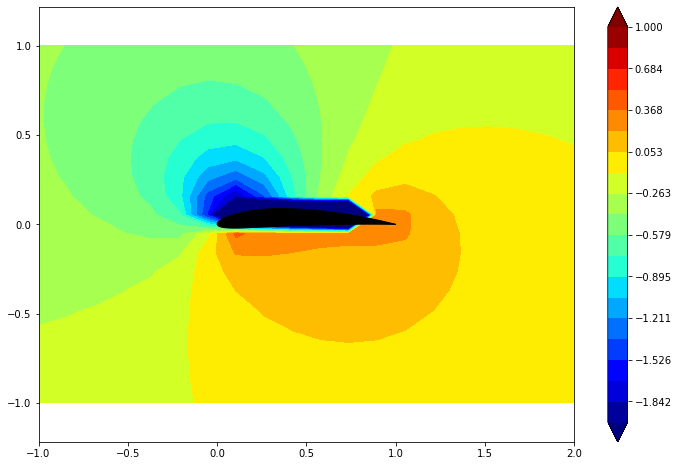

In [197]:
# plot velocity vectors

fig1=plt.figure(figsize=(12,8))
fig1.add_subplot(111)
plt.ylim(yLower,yUpper)
plt.xlim(xLeft,xRight)

plt.fill(xc,yc,c='black')
#plt.plot(xp,yp,c='red',lw=1)

cp_D=1-(xVelStream + yVelStream)**2/(Uinf)**2

#contf = plt.contourf(X, Y, cp_D,levels=np.linspace(-2.0, 1.0, 100), extend='both')
#contf = plt.contourf(X, Y, cp_D)
#plt.contourf(X,Y,cp_D,cmap='coolwarm',levels=np.linspace(-2.0, 1.0, 20), extend='both')
plt.contourf(X,Y,cp_D,cmap='jet',levels=np.linspace(-2.0, 1.0, 20), extend='both')
#plt.contourf(X,Y,cp_D,cmap='jet',levels=np.linspace(-2.0, 1.0, 100))
    
plt.axis('equal');



plt.colorbar()

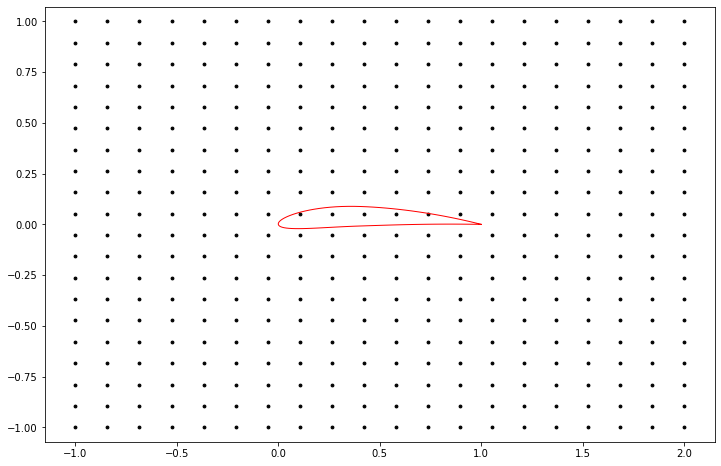

In [198]:
# plot grid points
#Notice that there are points inside the airfoil
#and they contribute to the overall potential

fig1=plt.figure(figsize=(12,8))
fig1.add_subplot(111)
plt.ylim(yLower,yUpper)
plt.xlim(xLeft,xRight)

#plt.fill(xc,yc,c='black')
plt.plot(xp,yp,c='red',lw=1)

plt.scatter(X,Y,s=8,c='black')

plt.axis('equal');

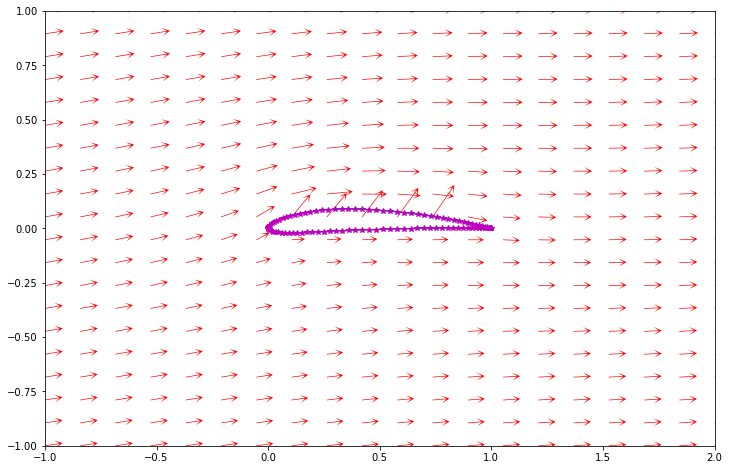

In [199]:
# plot velocity vectors
  
fig1=plt.figure(figsize=(12,8))
fig1.add_subplot(111)

plt.ylim(yLower,yUpper)
plt.xlim(xLeft,xRight)

plt.plot(xp,yp)

plt.quiver(X,Y,xVelStream,yVelStream,color='r',
          width=0.001,headwidth=12,headlength=12)

plt.plot(xc,yc,'*',color='m')


In [200]:
#Matplotlib numpy version
import matplotlib, numpy
print(matplotlib.__version__)
print(numpy.__version__)

3.3.4
1.20.1
